In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [2]:
data_train_path = 'data/train'
data_test_path = 'data/test'
data_val_path = 'data/val'

In [3]:
img_width = 180
img_height =180 

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 912 files belonging to 30 classes.


In [5]:
data_cat = data_train.class_names

In [6]:
data_cat

['Alpinia Galanga (Rasna)',
 'Amaranthus Viridis (Arive-Dantu)',
 'Artocarpus Heterophyllus (Jackfruit)',
 'Azadirachta Indica (Neem)',
 'Basella Alba (Basale)',
 'Brassica Juncea (Indian Mustard)',
 'Carissa Carandas (Karanda)',
 'Citrus Limon (Lemon)',
 'Ficus Auriculata (Roxburgh fig)',
 'Ficus Religiosa (Peepal Tree)',
 'Hibiscus Rosa-sinensis',
 'Jasminum (Jasmine)',
 'Mangifera Indica (Mango)',
 'Mentha (Mint)',
 'Moringa Oleifera (Drumstick)',
 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 'Murraya Koenigii (Curry)',
 'Nerium Oleander (Oleander)',
 'Nyctanthes Arbor-tristis (Parijata)',
 'Ocimum Tenuiflorum (Tulsi)',
 'Piper Betle (Betel)',
 'Plectranthus Amboinicus (Mexican Mint)',
 'Pongamia Pinnata (Indian Beech)',
 'Psidium Guajava (Guava)',
 'Punica Granatum (Pomegranate)',
 'Santalum Album (Sandalwood)',
 'Syzygium Cumini (Jamun)',
 'Syzygium Jambos (Rose Apple)',
 'Tabernaemontana Divaricata (Crape Jasmine)',
 'Trigonella Foenum-graecum (Fenugreek)']

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 543 files belonging to 30 classes.


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 380 files belonging to 30 classes.


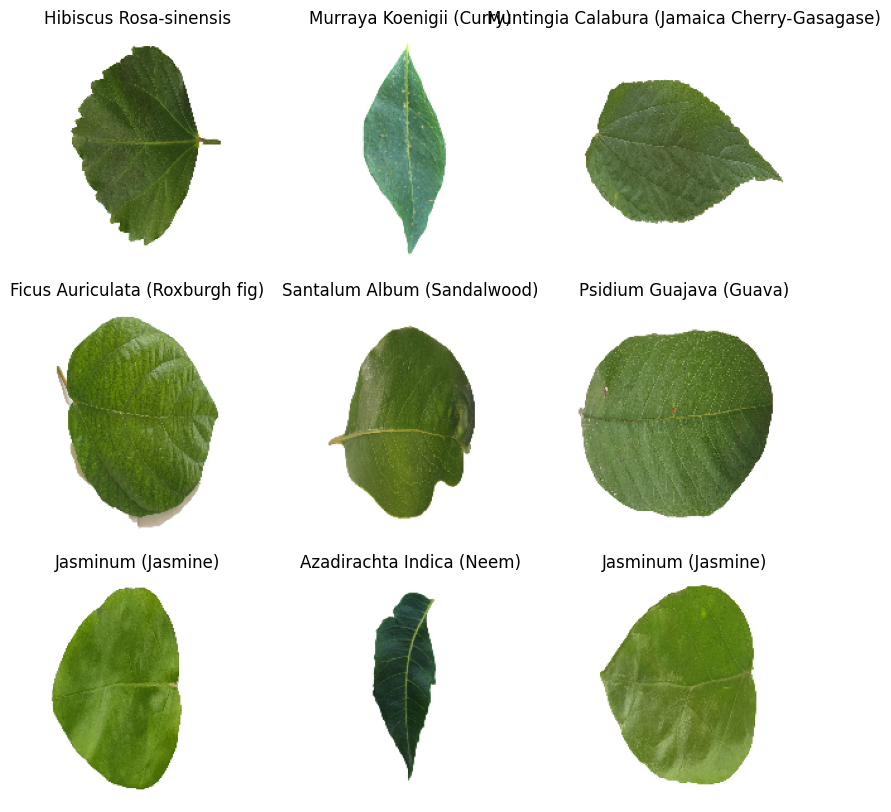

In [9]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [14]:
epochs_size = 5
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.1021 - loss: 4.7333 - val_accuracy: 0.3020 - val_loss: 2.4401
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.5364 - loss: 1.6616 - val_accuracy: 0.6372 - val_loss: 1.1889
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.8230 - loss: 0.5991 - val_accuracy: 0.6703 - val_loss: 1.0608
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.8871 - loss: 0.4365 - val_accuracy: 0.6667 - val_loss: 1.1674
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.9203 - loss: 0.2161 - val_accuracy: 0.6906 - val_loss: 1.0863


Text(0.5, 1.0, 'Loss')

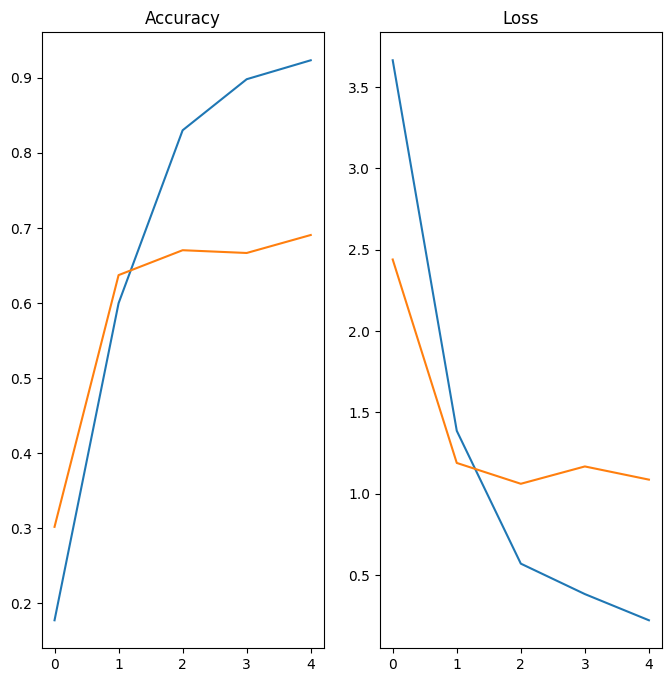

In [15]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
 Basella Alba (Basale) 
 Accuray =  40.34%


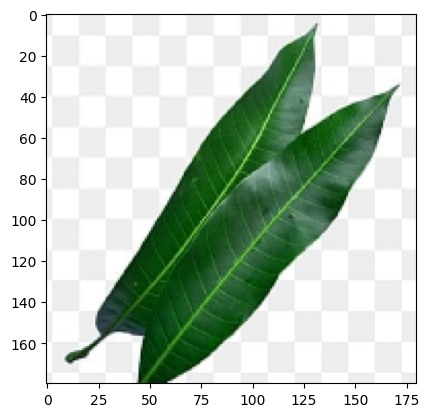

In [16]:
image = 'watleaf1.png'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)


predict = model.predict(img_bat)
score = tf.nn.softmax(predict)

plt.imshow(image) 
print(' {} \n Accuray =  {:0.2f}%'.format(data_cat[np.argmax(score)],np.max(score)*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
 Citrus Limon (Lemon) 
 Accuray =  34.45%


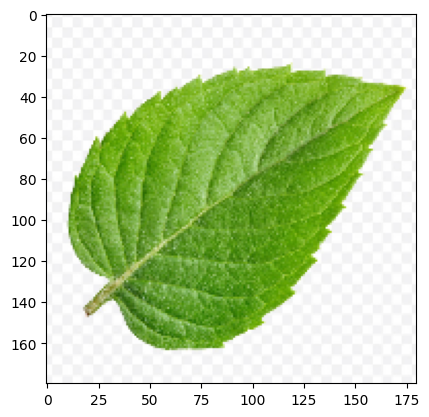

In [17]:
image = 'leaf4.png'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)


predict = model.predict(img_bat)
score = tf.nn.softmax(predict)

plt.imshow(image) 
print(' {} \n Accuray =  {:0.2f}%'.format(data_cat[np.argmax(score)],np.max(score)*100))